In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# データの読み込み

In [129]:
!pwd
!cd /home/masa1357/git/Credit-Score-Classification-Starter
train_df = pd.read_csv('./data/input/train.csv', index_col=0, low_memory=False)
train_df

/home/masa1357/git/Credit-Score-Classification-Starter


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Poor_Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
1,CUS_0x82bf,January,Laurenced,27,986-44-5074,Manager,56714.52,4561.2100,7,10,...,Standard,1796.88,27.928768,17 Years and 8 Months,Yes,165.335553,146.184765,High_spent_Medium_value_payments,394.6006822,1
2,CUS_0x82bf,February,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,NaN,1796.88,38.999315,17 Years and 9 Months,Yes,165.335553,63.447879,High_spent_Large_value_payments,467.3375679,1
3,CUS_0x82bf,March,NaN,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,NaN,1796.88,28.571061,NaN,NM,165.335553,334.670987,Low_spent_Small_value_payments,246.1144605,1
4,CUS_0x82bf,April,Laurenced,28,986-44-5074,Manager,56714.52,NaN,7,10,...,Standard,1796.88,24.294876,17 Years and 11 Months,Yes,165.335553,607.341279,Low_spent_Small_value_payments,NaN,1
5,CUS_0x82bf,May,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,703,10,...,Standard,1796.88,26.156116,18 Years and 0 Months,Yes,165.335553,111.010314,High_spent_Medium_value_payments,429.7751329,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,CUS_0x4e52,April,lew,38,983-62-4894,Lawyer,82583.61,6785.9675,6,4,...,Standard,1072.11,36.582150,NaN,Yes,50164.000000,130.456999,High_spent_Large_value_payments,615.3259797,0
69997,CUS_0x4e52,May,lew,38,983-62-4894,Lawyer,82583.61,6785.9675,6,4,...,Standard,1072.11,40.144034,25 Years and 7 Months,Yes,172.813771,NaN,High_spent_Small_value_payments,389.6464768,0
69998,CUS_0x4e52,June,lew,38,983-62-4894,Lawyer,82583.61,NaN,6,4,...,Standard,1072.11,39.785642,25 Years and 8 Months,Yes,172.813771,114.472674,High_spent_Large_value_payments,631.310305,0


In [130]:
test_df = pd.read_csv('./data/input/test.csv', index_col=0, low_memory=False)
test_df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
70001,CUS_0x9e8c,January,Wilkesm,19,715-55-8872,Teacher,32089.33,2882.110833,4,391,...,0.0,Good,435.89,24.636122,24 Years and 11 Months,No,71.306851,112.070971,Low_spent_Medium_value_payments,384.8332616
70002,CUS_0x9e8c,February,NaN,19,715-55-8872,Teacher,32089.33,2882.110833,4,6,...,0.0,Good,435.89,25.366827,NaN,NM,71.306851,227.445894,Low_spent_Large_value_payments,259.4583381
70003,CUS_0x9e8c,March,Wilkesm,19,715-55-8872,Teacher,32089.33,2882.110833,4,6,...,0.0,Good,435.89,31.206973,25 Years and 1 Months,No,71.306851,48.885902,!@9#%8,408.0183299
70004,CUS_0x9e8c,April,Wilkesm,19,715-55-8872,Teacher,32089.33,2882.110833,4,6,...,0.0,Good,435.89,38.190244,25 Years and 2 Months,No,71.306851,171.914418,Low_spent_Small_value_payments,334.9898139
70005,CUS_0x9e8c,May,Wilkesm,19,715-55-8872,Teacher,32089.33,2882.110833,4,6,...,0.0,Good,435.89,37.094119,25 Years and 3 Months,No,71.306851,263.988341,Low_spent_Large_value_payments,222.9158913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,CUS_0x17b5,April,Kiharak,51,714-28-0746,Doctor,110468.49,8934.707500,0,7,...,2.0,NaN,1195.71,28.527993,31 Years and 8 Months,No,52.458223,870.831749,Low_spent_Small_value_payments,260.1807776
99997,CUS_0x17b5,May,Kiharak,51,714-28-0746,Doctor,110468.49,8934.707500,0,7,...,2.0,NaN,1195.71,31.683169,31 Years and 9 Months,No,52.458223,126.737867,High_spent_Large_value_payments,954.274659
99998,CUS_0x17b5,June,Kiharak,51,714-28-0746,Doctor,110468.49,8934.707500,0,7,...,2.0,Good,1195.71,36.427377,31 Years and 10 Months,No,52.458223,271.759189,High_spent_Medium_value_payments,819.2533372


# 前処理
訓練データとテストデータを結合する

In [131]:
df = pd.concat([train_df.drop(['Poor_Credit_Score'], axis=1), test_df])
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
1,CUS_0x82bf,January,Laurenced,27,986-44-5074,Manager,56714.52,4561.2100,7,10,...,12.0,Standard,1796.88,27.928768,17 Years and 8 Months,Yes,165.335553,146.184765,High_spent_Medium_value_payments,394.6006822
2,CUS_0x82bf,February,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,38.999315,17 Years and 9 Months,Yes,165.335553,63.447879,High_spent_Large_value_payments,467.3375679
3,CUS_0x82bf,March,NaN,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,28.571061,NaN,NM,165.335553,334.670987,Low_spent_Small_value_payments,246.1144605
4,CUS_0x82bf,April,Laurenced,28,986-44-5074,Manager,56714.52,NaN,7,10,...,13.0,Standard,1796.88,24.294876,17 Years and 11 Months,Yes,165.335553,607.341279,Low_spent_Small_value_payments,NaN
5,CUS_0x82bf,May,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,703,10,...,13.0,Standard,1796.88,26.156116,18 Years and 0 Months,Yes,165.335553,111.010314,High_spent_Medium_value_payments,429.7751329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,CUS_0x17b5,April,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,28.527993,31 Years and 8 Months,No,52.458223,870.831749,Low_spent_Small_value_payments,260.1807776
99997,CUS_0x17b5,May,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,31.683169,31 Years and 9 Months,No,52.458223,126.737867,High_spent_Large_value_payments,954.274659
99998,CUS_0x17b5,June,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,Good,1195.71,36.427377,31 Years and 10 Months,No,52.458223,271.759189,High_spent_Medium_value_payments,819.2533372


In [132]:
cutdf = df[df['Monthly_Balance'].notna()]

cutdf

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
1,CUS_0x82bf,January,Laurenced,27,986-44-5074,Manager,56714.52,4561.2100,7,10,...,12.0,Standard,1796.88,27.928768,17 Years and 8 Months,Yes,165.335553,146.184765,High_spent_Medium_value_payments,394.6006822
2,CUS_0x82bf,February,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,38.999315,17 Years and 9 Months,Yes,165.335553,63.447879,High_spent_Large_value_payments,467.3375679
3,CUS_0x82bf,March,NaN,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,28.571061,NaN,NM,165.335553,334.670987,Low_spent_Small_value_payments,246.1144605
5,CUS_0x82bf,May,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,703,10,...,13.0,Standard,1796.88,26.156116,18 Years and 0 Months,Yes,165.335553,111.010314,High_spent_Medium_value_payments,429.7751329
6,CUS_0x82bf,June,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,Standard,1796.88,30.494130,18 Years and 1 Months,Yes,165.335553,283.790118,Low_spent_Small_value_payments,296.9953286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,CUS_0x17b5,April,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,28.527993,31 Years and 8 Months,No,52.458223,870.831749,Low_spent_Small_value_payments,260.1807776
99997,CUS_0x17b5,May,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,31.683169,31 Years and 9 Months,No,52.458223,126.737867,High_spent_Large_value_payments,954.274659
99998,CUS_0x17b5,June,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,Good,1195.71,36.427377,31 Years and 10 Months,No,52.458223,271.759189,High_spent_Medium_value_payments,819.2533372


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 1 to 100000
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Name                      90015 non-null   object 
 3   Age                       100000 non-null  int64  
 4   SSN                       100000 non-null  object 
 5   Occupation                92938 non-null   object 
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  int64  
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  int64 

欠損がある列を確認する

In [134]:
nan_rows = df.isna().any(axis=1).sum()
print(nan_rows)

df.loc[:, 'Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
std_dev = df['Monthly_Balance'].std()
std_dev
df['Monthly_Balance'].fillna(std_dev, inplace=True)
df

63217


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,,,,,,,,
1,CUS_0x82bf,January,Laurenced,27,986-44-5074,Manager,56714.52,4561.2100,7,10,...,12.0,Standard,1796.88,27.928768,17 Years and 8 Months,Yes,165.335553,146.184765,High_spent_Medium_value_payments,394.600682
2,CUS_0x82bf,February,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,38.999315,17 Years and 9 Months,Yes,165.335553,63.447879,High_spent_Large_value_payments,467.337568
3,CUS_0x82bf,March,NaN,28,986-44-5074,Manager,56714.52,4561.2100,7,10,...,13.0,NaN,1796.88,28.571061,NaN,NM,165.335553,334.670987,Low_spent_Small_value_payments,246.114461
4,CUS_0x82bf,April,Laurenced,28,986-44-5074,Manager,56714.52,NaN,7,10,...,13.0,Standard,1796.88,24.294876,17 Years and 11 Months,Yes,165.335553,607.341279,Low_spent_Small_value_payments,213.925499
5,CUS_0x82bf,May,Laurenced,28,986-44-5074,Manager,56714.52,4561.2100,703,10,...,13.0,Standard,1796.88,26.156116,18 Years and 0 Months,Yes,165.335553,111.010314,High_spent_Medium_value_payments,429.775133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,CUS_0x17b5,April,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,28.527993,31 Years and 8 Months,No,52.458223,870.831749,Low_spent_Small_value_payments,260.180778
99997,CUS_0x17b5,May,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,NaN,1195.71,31.683169,31 Years and 9 Months,No,52.458223,126.737867,High_spent_Large_value_payments,954.274659
99998,CUS_0x17b5,June,Kiharak,51,714-28-0746,Doctor,110468.49,8934.7075,0,7,...,2.0,Good,1195.71,36.427377,31 Years and 10 Months,No,52.458223,271.759189,High_spent_Medium_value_payments,819.253337


In [135]:
nan_rows = df.isna().any(axis=1).sum()
print(nan_rows)
df.isnull().sum()

62733


Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance                 0
dtype: int64

ここでは、欠損を含む特徴を全て削除し、欠損がない特徴だけを選択します。
（自分で工夫してください。）

また、`Customer_ID` と `SSN` は顧客ごとにユニークな値で、今回の予測には使えないため、選択しません。

In [136]:
df = df[['Month', 'Age', 'Annual_Income', 'Num_Bank_Accounts', 
         'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 
         'Delay_from_due_date', 'Outstanding_Debt', 
         'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 
         'Total_EMI_per_month', 'Payment_Behaviour','Monthly_Balance']]
df

,Month,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance
ID,,,,,,,,,,,,,,
1,January,27,56714.52,7,10,29,4,40,1796.88,27.928768,Yes,165.335553,High_spent_Medium_value_payments,394.600682
2,February,28,56714.52,7,10,29,4,40,1796.88,38.999315,Yes,165.335553,High_spent_Large_value_payments,467.337568
3,March,28,56714.52,7,10,29,4,40,1796.88,28.571061,NM,165.335553,Low_spent_Small_value_payments,246.114461
4,April,28,56714.52,7,10,29,4,40,1796.88,24.294876,Yes,165.335553,Low_spent_Small_value_payments,213.925499
5,May,28,56714.52,703,10,29,4,36,1796.88,26.156116,Yes,165.335553,High_spent_Medium_value_payments,429.775133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,April,51,110468.49,0,7,7,1,7,1195.71,28.527993,No,52.458223,Low_spent_Small_value_payments,260.180778
99997,May,51,110468.49,0,7,7,1,11,1195.71,31.683169,No,52.458223,High_spent_Large_value_payments,954.274659
99998,June,51,110468.49,0,7,7,1,7,1195.71,36.427377,No,52.458223,High_spent_Medium_value_payments,819.253337


欠損がないことを確認しておきます。

In [137]:
df.isnull().sum()

Month                       0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

文字列の特徴をダミー変数に変換します。

In [138]:
df = pd.get_dummies(df)
df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
ID,,,,,,,,,,,,,,,,,,,,,
1,27,56714.52,7,10,29,4,40,1796.88,27.928768,165.335553,...,False,False,True,False,False,True,False,False,False,False
2,28,56714.52,7,10,29,4,40,1796.88,38.999315,165.335553,...,False,False,True,False,True,False,False,False,False,False
3,28,56714.52,7,10,29,4,40,1796.88,28.571061,165.335553,...,True,False,False,False,False,False,False,False,False,True
4,28,56714.52,7,10,29,4,40,1796.88,24.294876,165.335553,...,False,False,True,False,False,False,False,False,False,True
5,28,56714.52,703,10,29,4,36,1796.88,26.156116,165.335553,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,51,110468.49,0,7,7,1,7,1195.71,28.527993,52.458223,...,False,True,False,False,False,False,False,False,False,True
99997,51,110468.49,0,7,7,1,11,1195.71,31.683169,52.458223,...,False,True,False,False,True,False,False,False,False,False
99998,51,110468.49,0,7,7,1,7,1195.71,36.427377,52.458223,...,False,True,False,False,False,True,False,False,False,False


訓練データとテストデータに再分割します。

In [139]:
nrow, ncol = train_df.shape
print(nrow, ncol)

70000 27


訓練データを取り出し、目的変数の列を追加します。残りはそのままテストデータにします。

In [140]:
train_df = df[:nrow].join(train_df['Poor_Credit_Score'])
train_df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,...,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments,Poor_Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
1,27,56714.52,7,10,29,4,40,1796.88,27.928768,165.335553,...,False,True,False,False,True,False,False,False,False,1
2,28,56714.52,7,10,29,4,40,1796.88,38.999315,165.335553,...,False,True,False,True,False,False,False,False,False,1
3,28,56714.52,7,10,29,4,40,1796.88,28.571061,165.335553,...,False,False,False,False,False,False,False,False,True,1
4,28,56714.52,7,10,29,4,40,1796.88,24.294876,165.335553,...,False,True,False,False,False,False,False,False,True,1
5,28,56714.52,703,10,29,4,36,1796.88,26.156116,165.335553,...,False,True,False,False,True,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69996,38,82583.61,6,4,10,3,10,1072.11,36.582150,50164.000000,...,False,True,False,True,False,False,False,False,False,0
69997,38,82583.61,6,4,10,3,9,1072.11,40.144034,172.813771,...,False,True,False,False,False,True,False,False,False,0
69998,38,82583.61,6,4,10,3,5,1072.11,39.785642,172.813771,...,False,True,False,True,False,False,False,False,False,0


In [141]:
test_df = df[nrow:]
test_df

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,...,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_!@9#%8,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
ID,,,,,,,,,,,,,,,,,,,,,
70001,19,32089.33,4,391,2,4,8,435.89,24.636122,71.306851,...,False,True,False,False,False,False,False,False,True,False
70002,19,32089.33,4,6,2,4,12,435.89,25.366827,71.306851,...,True,False,False,False,False,False,False,True,False,False
70003,19,32089.33,4,6,2,4,8,435.89,31.206973,71.306851,...,False,True,False,True,False,False,False,False,False,False
70004,19,32089.33,4,6,2,4,8,435.89,38.190244,71.306851,...,False,True,False,False,False,False,False,False,False,True
70005,19,32089.33,4,6,2,4,6,435.89,37.094119,71.306851,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,51,110468.49,0,7,7,1,7,1195.71,28.527993,52.458223,...,False,True,False,False,False,False,False,False,False,True
99997,51,110468.49,0,7,7,1,11,1195.71,31.683169,52.458223,...,False,True,False,False,True,False,False,False,False,False
99998,51,110468.49,0,7,7,1,7,1195.71,36.427377,52.458223,...,False,True,False,False,False,True,False,False,False,False


# 可視化
ここでは、相関係数行列を可視化しただけで、予測モデルには何も反映させていません。
（自分で工夫してください。）

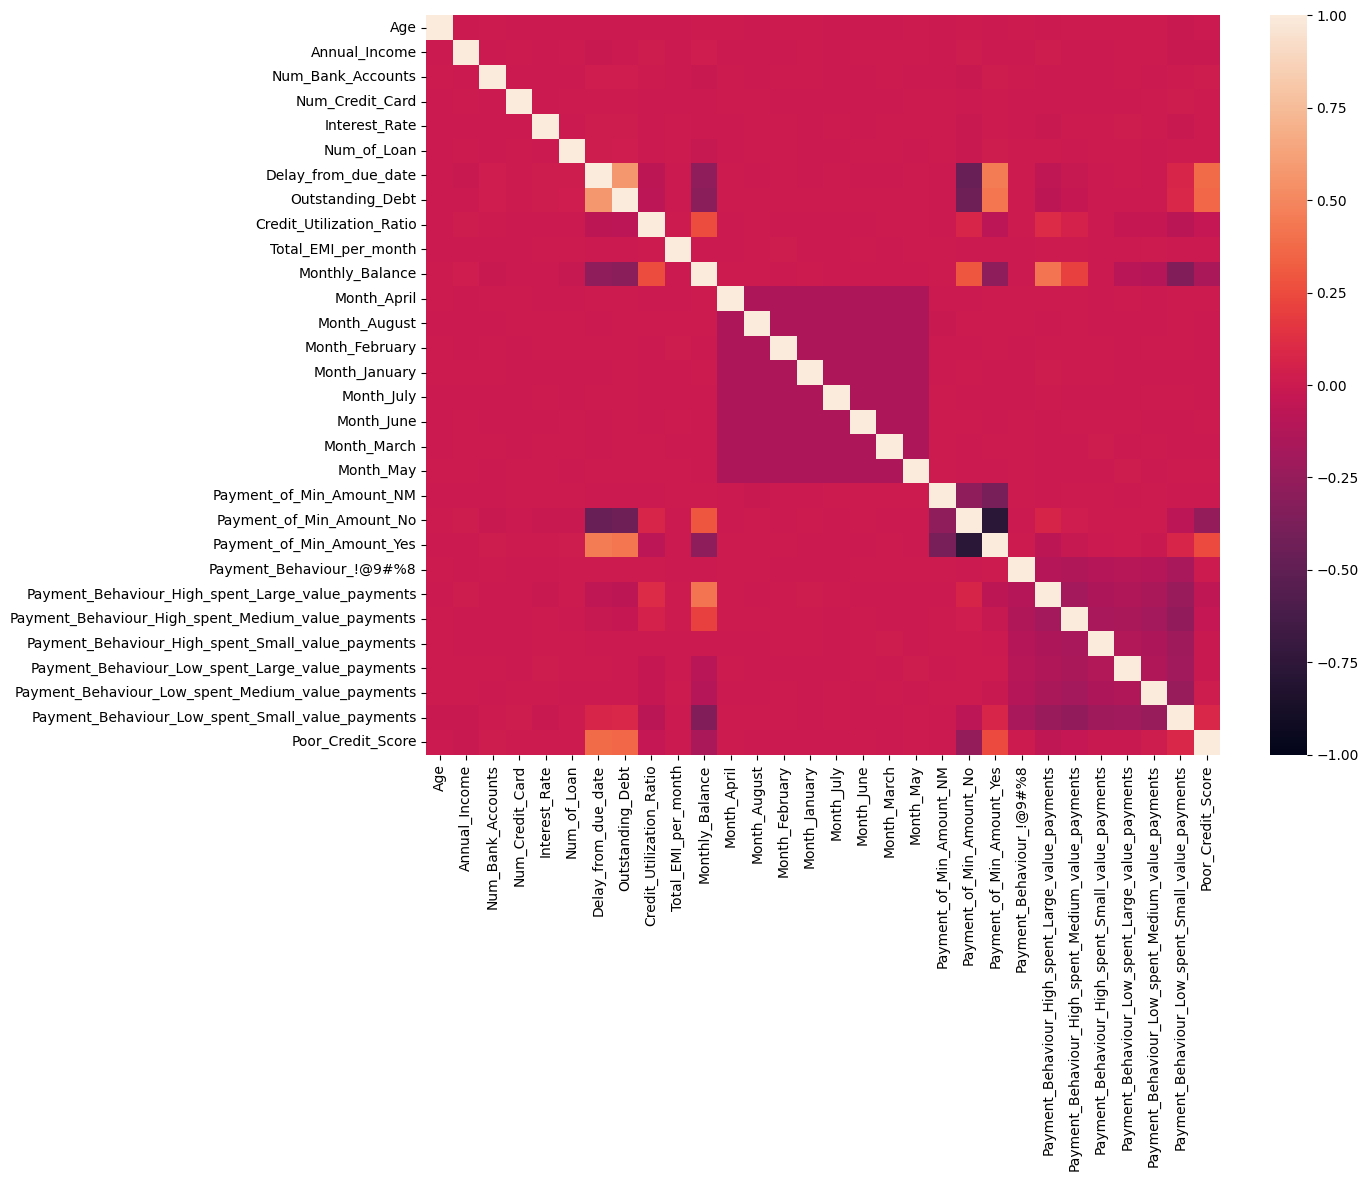

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_df.corr()

plt.figure(figsize=(12.8, 9.6))
sns.heatmap(corr, vmin=-1, vmax=1)
plt.show()

# 機械学習
ここでは、深さ3の決定木を学習します。（自分で工夫してください。）

In [143]:
from sklearn.tree import DecisionTreeClassifier

X_train = train_df.drop(['Poor_Credit_Score'], axis=1).to_numpy()
y_train = train_df['Poor_Credit_Score'].to_numpy()

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

学習したモデルを可視化します。

In [144]:
!pip3 -q install dtreeviz

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

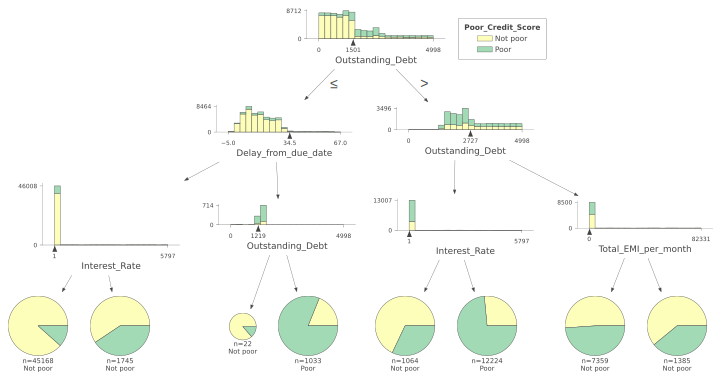

In [145]:
import dtreeviz

viz_model = dtreeviz.model(model, X_train=X_train, y_train=y_train,
    feature_names=train_df.columns,
    target_name='Poor_Credit_Score', class_names=['Not poor', 'Poor'])
viz_model.view()

# 予測
学習したモデルを用いて、テストデータの `Poor_Credit_Score` を予測する。
評価尺度が **AUC** であるため、`predict()` の替わりに `predict_proba()` を用いて確率を出力する。

In [146]:
X_test = test_df.to_numpy()

p_test =model.predict_proba(X_test)
p_test

array([[0.88418792, 0.11581208],
       [0.88418792, 0.11581208],
       [0.88418792, 0.11581208],
       ...,
       [0.88418792, 0.11581208],
       [0.88418792, 0.11581208],
       [0.88418792, 0.11581208]])

`Poor_Credit_Score` の値が 0 になる確率、1 になる確率が出力されているので、1 になる確率を取り出して提出用データに代入する。

In [147]:
submit_df = pd.read_csv('./data/output/sampleSubmission.csv', index_col=0)
submit_df['Poor_Credit_Score'] = p_test[:,1]
submit_df

,Poor_Credit_Score
ID,
70001,0.115812
70002,0.115812
70003,0.115812
70004,0.115812
70005,0.115812
...,...
99996,0.115812
99997,0.115812
99998,0.115812


CSVファイルとして出力する。

In [148]:
submit_df.to_csv('./data/output/sampleSubmission.csv')